In [74]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

##### Regression Models 

**Variables/Columns**

- `Age` - years
- `5K etc. Duration` - seconds
- `Temp` - Degrees Fahrenheit
- `Height` - inches
- `M/F` - Male or Female


### Read the csv file into a pandas DataFrame

In [75]:
boston = pd.read_csv('marathon/Boston_Marathon_2015_to_2017.csv')
#boston.head()
#boston.shape
boston.columns

Index(['Year', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division', 'Temp (F)'],
      dtype='object')

### Use Pandas get_dummies to convert categorical data

In [76]:
# convert male/female to 0/1s

boston_mf=pd.get_dummies(boston['M/F'])

# join the two dataframes

boston_join=pd.concat([boston, boston_mf], axis=1) 

boston_join.head()
# boston_join[['5K','10K','15K','20K','Half', '25K','30K']]

,Year,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Temp (F),F,M
0,2015,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,2:02:39,0:04:56,-,2:09:17,1,1,1,46,0,1
1,2015,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,2:02:42,0:04:58,-,2:09:48,2,2,2,46,0,1
2,2015,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,2:03:01,0:04:59,-,2:10:22,3,3,3,46,0,1
3,2015,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,2:03:47,0:05:00,-,2:10:47,4,4,4,46,0,1
4,2015,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,2:03:27,0:05:00,-,2:10:49,5,5,5,46,0,1


In [77]:
# Convert HH:MM:SS to total seconds

def time_convert(x):
    if x == "-":
        return None
    else:
        times = x.split(':')
        return (3600*int(times[0])+60*int(times[1]))+int(times[2])


boston_join['5K Duration'] = boston_join['5K'].apply(time_convert)
boston_join['10K Duration'] = boston_join['10K'].apply(time_convert)
boston_join['15K Duration'] = boston_join['15K'].apply(time_convert)
boston_join['20K Duration'] = boston_join['20K'].apply(time_convert)
boston_join['Half Duration'] = boston_join['Half'].apply(time_convert)
boston_join['25K Duration'] = boston_join['25K'].apply(time_convert)
boston_join['30K Duration'] = boston_join['30K'].apply(time_convert)
boston_join['35K Duration'] = boston_join['35K'].apply(time_convert)
boston_join['40K Duration'] = boston_join['40K'].apply(time_convert)
boston_join['Official Time Duration'] = boston_join['Official Time'].apply(time_convert)

# Drop rows with null values

boston_join.dropna(inplace=True,subset=['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'Temp (F)'])

boston_clean=boston_join[['Bib','Age','5K Duration','10K Duration','15K Duration','20K Duration', 'Half Duration', '25K Duration','30K Duration','35K Duration','40K Duration','Official Time Duration', 'Temp (F)', 'F', 'M']]

# boston_clean.head(10)

boston_clean[['Bib','5K Duration','10K Duration','15K Duration','20K Duration','Half Duration', '25K Duration','30K Duration','Official Time Duration']]

,Bib,5K Duration,10K Duration,15K Duration,20K Duration,Half Duration,25K Duration,30K Duration,Official Time Duration
0,3,883,1783,2697,3629,3842,4567,5520,7757
1,4,883,1783,2698,3628,3841,4567,5519,7788
2,8,883,1783,2697,3629,3842,4567,5520,7822
3,11,883,1784,2701,3629,3842,4567,5520,7847
4,10,883,1784,2698,3628,3841,4567,5520,7849
5,9,884,1785,2699,3629,3842,4567,5520,7852
6,14,885,1785,2720,3643,3843,4565,5519,7880
7,1,884,1784,2699,3630,3842,4567,5519,7962
8,5,883,1783,2698,3628,3842,4567,5520,8015
9,16,914,1834,2765,3703,3907,4638,5591,8032


### Assign X (data) and y (target)
Make sure the data is in the appropriate shape

In [78]:
### set up data for modeling
X_5K = boston_clean[['Bib','Age','Official Time Duration', 'F', 'M', 'Temp (F)']]
y_5K = boston_clean['5K Duration'].values.reshape(-1, 1)
print(X_5K.shape, y_5K.shape)

(79038, 6) (79038, 1)


### Split the data into training and testing

In [79]:
from sklearn.model_selection import train_test_split

X_train_5K, X_test_5K, y_train_5K, y_test_5K = train_test_split(X_5K, y_5K, random_state=29)

X_train_5K.head()

,Bib,Age,Official Time Duration,F,M,Temp (F)
66445,30824,49,14006,0,1,73
56920,12298,26,11856,1,0,73
36463,20672,52,13093,1,0,61
57842,7090,51,12121,0,1,73
30644,4640,40,11853,0,1,61


### Create a `StandardScaler` model and fit it to the training data

In [80]:
# from sklearn.preprocessing import StandardScaler


# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

### Transform the training and testing data using the your `StandardScaler` models created above

# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

### Create a LinearRegression model and fit it to the training data

In [81]:
from sklearn.linear_model import LinearRegression
model_5K = LinearRegression()
model_5K.fit(X_train_5K, y_train_5K)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Make predictions using the test data

In [82]:
predictions_5K = model_5K.predict(X_test_5K)

In [83]:
# Predictions is an array of predicted values
print(predictions_5K)

[[1594.27894476]
 [1656.65883747]
 [1859.40813675]
 ...
 [1440.48644662]
 [1678.51869071]
 [1547.44660759]]


In [84]:
df2=pd.DataFrame({'Bib':[25000], 'Age':[42],'Official Time Duration':[22175], 'F':[0], 'M':[1],'Temp (F)':[65]})
model_5K.predict(df2)

array([[2069.96957642]])

### Plot the residual plot for the predictions on the scaled training and test data 

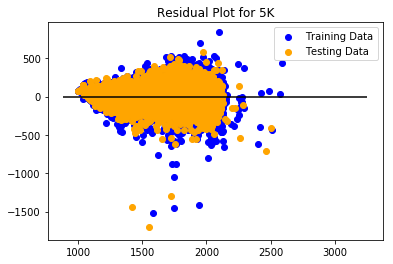

In [85]:
plt.scatter(model_5K.predict(X_train_5K), model_5K.predict(X_train_5K) - y_train_5K, c="blue", label="Training Data")
plt.scatter(model_5K.predict(X_test_5K), model_5K.predict(X_test_5K) - y_test_5K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_5K.min(), xmax=y_test_5K.max())
plt.title("Residual Plot for 5K")
plt.savefig('model_5k.png')
plt.show()


### Calculate MSE and $R^2$ for the model

In [86]:
# Used X_test_5K, y_test_5K, and model.predict(X_test_5K) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_5K, predictions_5K)
r2 = model_5K.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model
boston_r2=[]
boston_mse=[]
boston_models = []

boston_models.append('5K')
boston_mse.append(MSE)
boston_r2.append(r2)



MSE: 7302.074522731132, R2: 0.8684670365890306


In [87]:
# Save the model as a pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_5K, 'model_5K.pk1')

['model_5K.pk1']

In [88]:
# # To save the model without the training data, in order to make predictions without re-training the model
# # Source: https://www.geeksforgeeks.org/saving-a-machine-learning-model/

# import pickle
# from sklearn.externals import joblib 
  
# # Save the model as a pickle in a file 
# joblib.dump(model_5K, 'model_5K.pkl') 
  
# # Load the model from the file 
# model_5K_from_joblib = joblib.load('model_5K.pkl')  
  
# # Use the loaded model to make predictions 
# model_5K_from_joblib.predict(X_test_5K) 

### LASSO model

performs feature selection by reducing small coefficient values to absolute zero

In [89]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_5K, y_train_5K)

predictions = lasso.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions_5K)
r2 = lasso.score(X_test_5K, y_test_5K)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 7302.074522731132, R2: 0.8684679246721407


### Ridge model

reduces multicollinearity
create plot to show differences in coefficient values
use code from here: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

In [90]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

ridge_5K = Ridge(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = ridge_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = ridge_5K.score(X_test_5K, y_test_5K)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 7302.025220648334, R2: 0.8684670366340624


### ElasticNet model

In [91]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet_5K = ElasticNet(alpha=.01).fit(X_train_5K, y_train_5K)

predictions_5K = elasticnet_5K.predict(X_test_5K)

MSE = mean_squared_error(y_test_5K, predictions)
r2 = elasticnet_5K.score(X_test_5K, y_test_5K)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 7302.025220648334, R2: 0.8684687609607744


(79038, 5) (79038, 1)


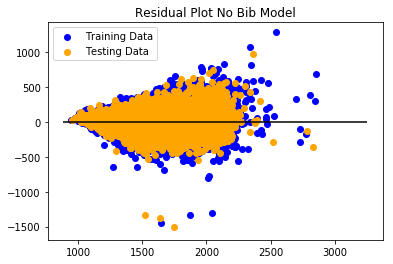

In [92]:
# Re-run the model without the Bib numbers as a feature to test if Bib numbers are helpful

### set up data for modeling
X_nobib = boston_clean[['Age','Official Time Duration', 'F', 'M', 'Temp (F)']]
y_nobib = boston_clean['5K Duration'].values.reshape(-1, 1)
print(X_nobib.shape, y_nobib.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_nobib, X_test_nobib, y_train_nobib, y_test_nobib = train_test_split(X_nobib, y_nobib, random_state=29)
# X_train_nobib.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_nobib = LinearRegression()
model_nobib.fit(X_train_nobib, y_train_nobib)

# Make predictions

predictions_nobib = model_nobib.predict(X_test_nobib)

# Plot the residuals

plt.scatter(model_nobib.predict(X_train_nobib), model_nobib.predict(X_train_nobib) - y_train_nobib, c="blue", label="Training Data")
plt.scatter(model_nobib.predict(X_test_nobib), model_nobib.predict(X_test_nobib) - y_test_nobib, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_nobib.min(), xmax=y_test_nobib.max())
plt.title("Residual Plot No Bib Model")
plt.savefig('model_nonbib.png')
plt.show()

In [93]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_nobib, predictions)
r2 = model_nobib.score(X_test_nobib, y_test_nobib)


print(f"MSE: {MSE}, R2: {r2}")

# Model built without Bib numbers has a smaller R2 value, so Bib numbers was helping model predictions

# create lists of MSE and r2 values for each model

# boston_models.append('nobib')
# boston_mse.append(MSE)
# boston_r2.append(r2)


MSE: 7302.025220648334, R2: 0.805284760701195


(79038, 7) (79038, 1)


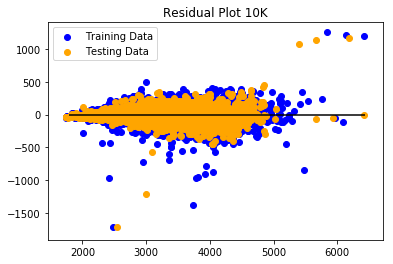

In [94]:
# Re-run the model with the Bib numbers as a feature and for the 5K split times to predict 10K time

### set up data for modeling
X_10K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration']]
y_10K = boston_clean['10K Duration'].values.reshape(-1, 1)
print(X_10K.shape, y_10K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_10K, X_test_10K, y_train_10K, y_test_10K = train_test_split(X_10K, y_10K, random_state=29)
# X_train_5K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_10K = LinearRegression()
model_10K.fit(X_train_10K, y_train_10K)

# Make predictions

predictions_10K = model_10K.predict(X_test_10K)

# Plot the residuals

plt.scatter(model_10K.predict(X_train_10K), model_10K.predict(X_train_10K) - y_train_10K, c="blue", label="Training Data")
plt.scatter(model_10K.predict(X_test_10K), model_10K.predict(X_test_10K) - y_test_10K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_10K.min(), xmax=y_test_10K.max())
plt.title("Residual Plot 10K")
plt.savefig('model_10k.png')
plt.show()


In [95]:
predictions_10K

array([[3056.10076138],
       [3592.10492139],
       [3803.95565389],
       ...,
       [2853.06198174],
       [3368.00961459],
       [3134.12713497]])

In [96]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_10K, predictions_10K)
r2 = model_10K.score(X_test_10K, y_test_10K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('10K')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 2994.148451799666, R2: 0.9866864130443542


In [97]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_10K, 'model_10K.pk1')

['model_10K.pk1']

(79038, 8) (79038, 1)


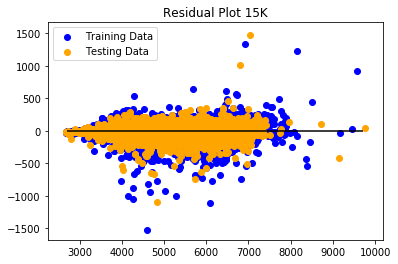

In [98]:
# Re-run the model with the Bib numbers as a feature and for the 5K and 10K split times to predict 15K time

### set up data for modeling
X_15K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration']]
y_15K = boston_clean['15K Duration'].values.reshape(-1, 1)
print(X_15K.shape, y_15K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_15K, X_test_15K, y_train_15K, y_test_15K = train_test_split(X_15K, y_15K, random_state=29)
# X_train_15K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_15K = LinearRegression()
model_15K.fit(X_train_15K, y_train_15K)

# Make predictions

predictions_15K = model_15K.predict(X_test_15K)

# Plot the residuals

plt.scatter(model_15K.predict(X_train_15K), model_15K.predict(X_train_15K) - y_train_15K, c="blue", label="Training Data")
plt.scatter(model_15K.predict(X_test_15K), model_15K.predict(X_test_15K) - y_test_15K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_15K.min(), xmax=y_test_15K.max())
plt.title("Residual Plot 15K")
plt.savefig('model_15k.png')
plt.show()


In [99]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_15K, predictions_15K)
r2 = model_15K.score(X_test_15K, y_test_15K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('15K')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 2828.968308130163, R2: 0.9946497344654838


In [100]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_15K, 'model_15K.pk1')

['model_15K.pk1']

(79038, 9) (79038, 1)


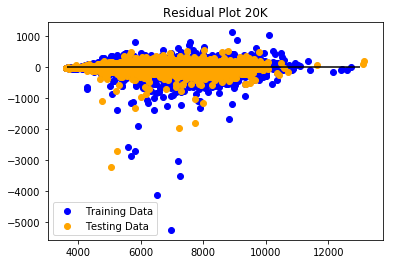

In [101]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K and 15K split times to predict 20K time

### set up data for modeling
X_20K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration']]
y_20K = boston_clean['20K Duration'].values.reshape(-1, 1)
print(X_20K.shape, y_20K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_20K, X_test_20K, y_train_20K, y_test_20K = train_test_split(X_20K, y_20K, random_state=29)
# X_train_20K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_20K = LinearRegression()
model_20K.fit(X_train_20K, y_train_20K)

# Make predictions

predictions_20K = model_20K.predict(X_test_20K)

# Plot the residuals

plt.scatter(model_20K.predict(X_train_20K), model_20K.predict(X_train_20K) - y_train_20K, c="blue", label="Training Data")
plt.scatter(model_20K.predict(X_test_20K), model_20K.predict(X_test_20K) - y_test_20K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_20K.min(), xmax=y_test_20K.max())
plt.title("Residual Plot 20K")
plt.savefig('model_20k.png')
plt.show()


In [102]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_20K, predictions_20K)
r2 = model_20K.score(X_test_20K, y_test_20K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('20K')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 5065.672006739615, R2: 0.9949920389034161


In [103]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_20K, 'model_20K.pk1')

['model_20K.pk1']

(79038, 10) (79038, 1)


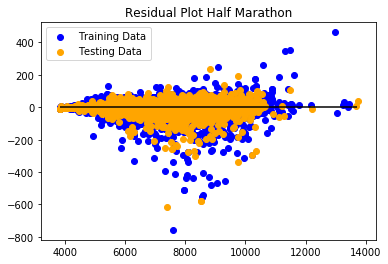

In [104]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K and 20K split times to predict Half marathon time

### set up data for modeling
X_Half = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration']]
y_Half = boston_clean['Half Duration'].values.reshape(-1, 1)
print(X_Half.shape, y_Half.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_Half, X_test_Half, y_train_Half, y_test_Half = train_test_split(X_Half, y_Half, random_state=29)
# X_train_Half.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_Half = LinearRegression()
model_Half.fit(X_train_Half, y_train_Half)

# Make predictions

predictions_Half = model_Half.predict(X_test_Half)

# Plot the residuals

plt.scatter(model_Half.predict(X_train_Half), model_Half.predict(X_train_Half) - y_train_Half, c="blue", label="Training Data")
plt.scatter(model_Half.predict(X_test_Half), model_Half.predict(X_test_Half) - y_test_Half, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_Half.min(), xmax=y_test_Half.max())
plt.title("Residual Plot Half Marathon")
plt.savefig('model_Half.png')
plt.show()


In [105]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_Half, predictions_Half)
r2 = model_Half.score(X_test_Half, y_test_Half)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('Half')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 320.63732522905667, R2: 0.9997163561866615


In [106]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_Half, 'model_Half.pk1')

['model_Half.pk1']

(79038, 11) (79038, 1)


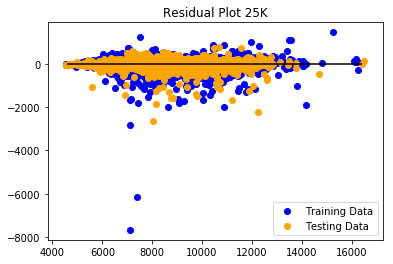

In [107]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K and Half split times to predict 25K time

### set up data for modeling
X_25K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', 'Half Duration']]
y_25K = boston_clean['25K Duration'].values.reshape(-1, 1)
print(X_25K.shape, y_25K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_25K, X_test_25K, y_train_25K, y_test_25K = train_test_split(X_25K, y_25K, random_state=29)
# X_train_25K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_25K = LinearRegression()
model_25K.fit(X_train_25K, y_train_25K)

# Make predictions

predictions_25K = model_25K.predict(X_test_25K)

# Plot the residuals

plt.scatter(model_25K.predict(X_train_25K), model_25K.predict(X_train_25K) - y_train_25K, c="blue", label="Training Data")
plt.scatter(model_25K.predict(X_test_25K), model_25K.predict(X_test_25K) - y_test_25K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_25K.min(), xmax=y_test_25K.max())
plt.title("Residual Plot 25K")
plt.savefig('model_25k.png')
plt.show()


In [108]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_25K, predictions_25K)
r2 = model_25K.score(X_test_25K, y_test_25K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('25K')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 6579.135267226174, R2: 0.9961762820043337


In [109]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_25K, 'model_25K.pk1')

['model_25K.pk1']

(79038, 12) (79038, 1)


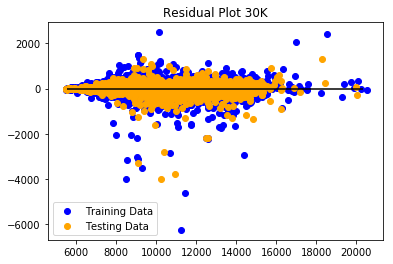

In [110]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K and half split times to predict 30K time

### set up data for modeling
X_30K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration']]
y_30K = boston_clean['30K Duration'].values.reshape(-1, 1)
print(X_30K.shape, y_30K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_30K, X_test_30K, y_train_30K, y_test_30K = train_test_split(X_30K, y_30K, random_state=29)
# X_train_30K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_30K = LinearRegression()
model_30K.fit(X_train_30K, y_train_30K)

# Make predictions

predictions_30K = model_30K.predict(X_test_30K)

# Plot the residuals

plt.scatter(model_30K.predict(X_train_30K), model_30K.predict(X_train_30K) - y_train_30K, c="blue", label="Training Data")
plt.scatter(model_30K.predict(X_test_30K), model_30K.predict(X_test_30K) - y_test_30K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_30K.min(), xmax=y_test_30K.max())
plt.title("Residual Plot 30K")
plt.savefig('model_30k.png')
plt.show()


In [111]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_30K, predictions_30K)
r2 = model_30K.score(X_test_30K, y_test_30K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('30K')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 10553.949084271524, R2: 0.9961142998468477


In [112]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_30K, 'model_30K.pk1')

['model_30K.pk1']

(79038, 12) (79038, 1)


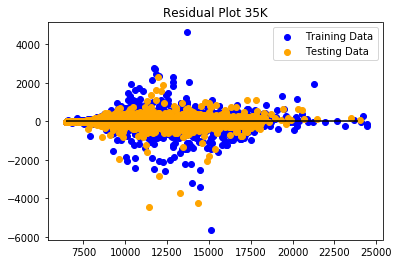

In [113]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K half and 30K split times to predict 35K time

### set up data for modeling
X_35K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration', '30K Duration']]
y_35K = boston_clean['35K Duration'].values.reshape(-1, 1)
print(X_30K.shape, y_30K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_35K, X_test_35K, y_train_35K, y_test_35K = train_test_split(X_35K, y_35K, random_state=29)
# X_train_30K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_35K = LinearRegression()
model_35K.fit(X_train_35K, y_train_35K)

# Make predictions

predictions_35K = model_35K.predict(X_test_35K)

# Plot the residuals

plt.scatter(model_35K.predict(X_train_35K), model_35K.predict(X_train_35K) - y_train_35K, c="blue", label="Training Data")
plt.scatter(model_35K.predict(X_test_35K), model_35K.predict(X_test_35K) - y_test_35K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_35K.min(), xmax=y_test_35K.max())
plt.title("Residual Plot 35K")
plt.savefig('model_35k.png')
plt.show()


In [114]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_35K, predictions_35K)
r2 = model_35K.score(X_test_35K, y_test_35K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('35K')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 11479.539783322489, R2: 0.9971232931237148


In [115]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_35K, 'model_35K.pk1')

['model_35K.pk1']

(79038, 13) (79038, 1)


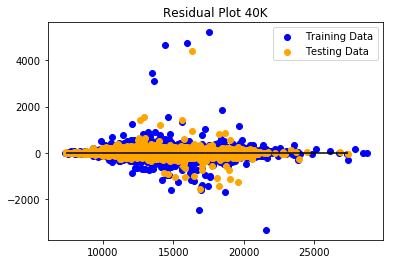

In [116]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K, half and 35K split times to predict 40K time

### set up data for modeling
X_40K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration', '35K Duration']]
# X_40K = boston_clean[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)','35K Duration']]
y_40K = boston_clean['40K Duration'].values.reshape(-1, 1)
print(X_40K.shape, y_40K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_40K, X_test_40K, y_train_40K, y_test_40K = train_test_split(X_40K, y_40K, random_state=29)
# X_train_40K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_40K = LinearRegression()
model_40K.fit(X_train_40K, y_train_40K)

# Make predictions

predictions_40K = model_40K.predict(X_test_40K)

# Plot the residuals

plt.scatter(model_40K.predict(X_train_40K), model_40K.predict(X_train_40K) - y_train_40K, c="blue", label="Training Data")
plt.scatter(model_40K.predict(X_test_40K), model_40K.predict(X_test_40K) - y_test_40K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_40K.min(), xmax=y_test_40K.max())
plt.title("Residual Plot 40K")
plt.savefig('model_40k.png')
plt.show()


In [117]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_40K, predictions_40K)
r2 = model_40K.score(X_test_40K, y_test_40K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('40K')
boston_mse.append(MSE)
boston_r2.append(r2)

MSE: 4243.417362698273, R2: 0.9992163164734275


In [118]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_40K, 'model_40K.pk1')

['model_40K.pk1']

(79038, 13) (79038, 1)


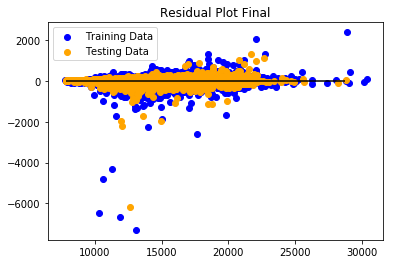

In [119]:
# Re-run the model with the Bib numbers as a feature and for the 5K, 10K 15K 20K 25K, half, 35K and 40K split times to predict Final time

### set up data for modeling
X_Final = boston_clean[['Bib', 'Age', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration', '25K Duration', 'Half Duration', '35K Duration', '40K Duration']]
y_Final = boston_clean['Official Time Duration'].values.reshape(-1, 1)
print(X_Final.shape, y_Final.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_Final, X_test_Final, y_train_Final, y_test_Final = train_test_split(X_Final, y_Final, random_state=29)
# X_train_Final.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_Final = LinearRegression()
model_Final.fit(X_train_Final, y_train_Final)

# Make predictions

predictions_Final = model_Final.predict(X_test_Final)

# Plot the residuals

plt.scatter(model_Final.predict(X_train_Final), model_Final.predict(X_train_Final) - y_train_Final, c="blue", label="Training Data")
plt.scatter(model_Final.predict(X_test_Final), model_Final.predict(X_test_Final) - y_test_Final, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_Final.min(), xmax=y_test_Final.max())
plt.title("Residual Plot Final")
plt.savefig('model_Final.png')
plt.show()


In [120]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_Final, predictions_Final)
r2 = model_Final.score(X_test_Final, y_test_Final)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('Final')
boston_mse.append(MSE)
boston_r2.append(r2)


MSE: 7505.016614294072, R2: 0.9987574348236969


In [121]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_Final, 'model_Final.pk1')

['model_Final.pk1']

In [122]:
boston_clean.columns

Index(['Bib', 'Age', '5K Duration', '10K Duration', '15K Duration',
       '20K Duration', 'Half Duration', '25K Duration', '30K Duration',
       '35K Duration', '40K Duration', 'Official Time Duration', 'Temp (F)',
       'F', 'M'],
      dtype='object')

In [123]:
boston_mse

[7302.074522731132,
 2994.148451799666,
 2828.968308130163,
 5065.672006739615,
 320.63732522905667,
 6579.135267226174,
 10553.949084271524,
 11479.539783322489,
 4243.417362698273,
 7505.016614294072]

In [124]:
boston_r2

[0.8684670365890306,
 0.9866864130443542,
 0.9946497344654838,
 0.9949920389034161,
 0.9997163561866615,
 0.9961762820043337,
 0.9961142998468477,
 0.9971232931237148,
 0.9992163164734275,
 0.9987574348236969]

In [125]:
boston_residuals_df=pd.DataFrame({
    'boston_models':boston_models,
    'boston_mse':boston_mse,
    'boston_r2':boston_r2
})
boston_residuals_df

,boston_models,boston_mse,boston_r2
0,5K,7302.074523,0.868467
1,10K,2994.148452,0.986686
2,15K,2828.968308,0.994650
3,20K,5065.672007,0.994992
4,Half,320.637325,0.999716
5,25K,6579.135267,0.996176
6,30K,10553.949084,0.996114
7,35K,11479.539783,0.997123
8,40K,4243.417363,0.999216
9,Final,7505.016614,0.998757


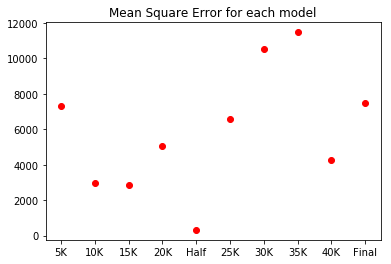

In [126]:
# Plot the residuals of each model

plt.scatter(boston_residuals_df['boston_models'], boston_mse, c="red", label="MSE")

# plt.scatter(model_Final.predict(X_test_Final), model_Final.predict(X_test_Final) - y_test_Final, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_Final.min(), xmax=y_test_Final.max())
plt.title("Mean Square Error for each model")
plt.savefig('MSE.png')
plt.show()


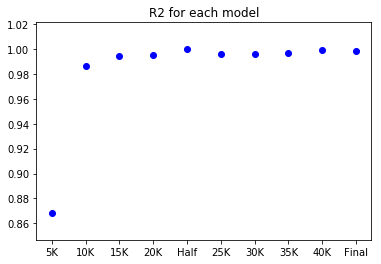

In [127]:
plt.scatter(boston_residuals_df['boston_models'], boston_r2, c="blue", label="R2")
# plt.legend()
plt.title("R2 for each model")
plt.savefig('R2.png')
plt.show()


In [128]:
boston_females=boston_clean.loc[boston_clean['F'] == 1]
boston_females

,Bib,Age,5K Duration,10K Duration,15K Duration,20K Duration,Half Duration,25K Duration,30K Duration,35K Duration,40K Duration,Official Time Duration,Temp (F),F,M
30,11,30,1019,2064,3109,4140,4365,5168,6204,7250,8250,8695,46,1,0
31,2,25,1018,2063,3108,4140,4365,5168,6203,7250,8250,8699,46,1,0
33,1,27,1017,2063,3109,4141,4365,5169,6204,7250,8250,8709,46,1,0
39,10,31,1020,2064,3108,4140,4365,5168,6203,7249,8271,8739,46,1,0
43,8,31,1019,2064,3109,4141,4366,5169,6204,7250,8282,8765,46,1,0
51,9,34,1018,2063,3108,4140,4364,5168,6203,7250,8291,8800,46,1,0
53,3,28,1018,2063,3109,4140,4365,5168,6204,7250,8291,8812,46,1,0
57,6,19,1018,2063,3109,4140,4366,5168,6204,7250,8301,8834,46,1,0
61,4,33,1018,2064,3109,4141,4365,5169,6214,7295,8385,8867,46,1,0
74,16,26,1018,2063,3108,4140,4365,5168,6203,7250,8334,8947,46,1,0


(35907, 14) (35907, 1)


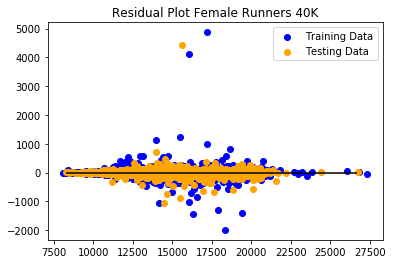

In [129]:
# Re-run the model with ONLY female runners, and  features of the 5K, 10K 15K 20K 25K, half and 35K split times to predict 40K time

### set up data for modeling
X_F40K = boston_females[['Bib', 'Age','Official Time Duration', 'F', 'M', 'Temp (F)', '5K Duration', '10K Duration', '15K Duration', '20K Duration','Half Duration', '25K Duration', '30K Duration', '35K Duration']]
y_F40K = boston_females['40K Duration'].values.reshape(-1, 1)
print(X_F40K.shape, y_F40K.shape)

# split the data into test and train subsets

from sklearn.model_selection import train_test_split

X_train_F40K, X_test_F40K, y_train_F40K, y_test_F40K = train_test_split(X_F40K, y_F40K, random_state=29)
# X_train_F40K.head()

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression
model_F40K = LinearRegression()
model_F40K.fit(X_train_F40K, y_train_F40K)

# Make predictions

predictions_F40K = model_F40K.predict(X_test_F40K)

# Plot the residuals

plt.scatter(model_F40K.predict(X_train_F40K), model_F40K.predict(X_train_F40K) - y_train_F40K, c="blue", label="Training Data")
plt.scatter(model_F40K.predict(X_test_F40K), model_F40K.predict(X_test_F40K) - y_test_F40K, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_F40K.min(), xmax=y_test_F40K.max())
plt.title("Residual Plot Female Runners 40K")
plt.savefig('model_F40K.png')
plt.show()


In [130]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_F40K, predictions_F40K)
r2 = model_F40K.score(X_test_F40K, y_test_F40K)


print(f"MSE: {MSE}, R2: {r2}")

# create lists of MSE and r2 values for each model

boston_models.append('F40K')
boston_mse.append(MSE)
boston_r2.append(r2)

boston_residuals_df=pd.DataFrame({
    'boston_models':boston_models,
    'boston_mse':boston_mse,
    'boston_r2':boston_r2
})
boston_residuals_df

MSE: 4219.460135952604, R2: 0.9990982695390382


,boston_models,boston_mse,boston_r2
0,5K,7302.074523,0.868467
1,10K,2994.148452,0.986686
2,15K,2828.968308,0.994650
3,20K,5065.672007,0.994992
4,Half,320.637325,0.999716
5,25K,6579.135267,0.996176
6,30K,10553.949084,0.996114
7,35K,11479.539783,0.997123
8,40K,4243.417363,0.999216
9,Final,7505.016614,0.998757


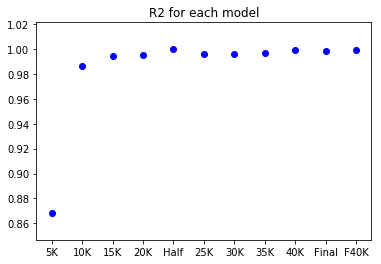

In [131]:
plt.scatter(boston_residuals_df['boston_models'], boston_r2, c="blue", label="R2")
# plt.legend()
plt.title("R2 for each model")
plt.savefig('R2.png')
plt.show()


In [132]:
# Save the model as pickle file

import pickle
from sklearn.externals import joblib

joblib.dump(model_F40K, 'model_F40K.pk1')

['model_F40K.pk1']

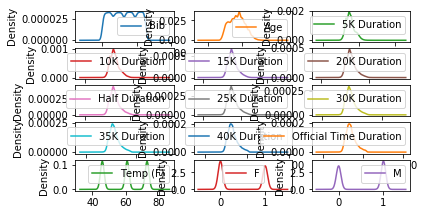

In [133]:
# Univariate Density Plots

# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# data = pandas.read_csv(url, names=names)
boston_clean.plot(kind='density', subplots=True, layout=(6,3), sharex=False)
plt.show()